### Preliminary overview

This notebook uses the data from the runs of biogeochemical model adjusted for the Wadden Sea.

In [1]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import seaborn as sns
sns.set()

#### Check surface fluxes of CO$_2$ and O$_2$

In [2]:
ds = xr.open_dataset('data/results_so4_adv/5_po75-25_di10e-9/water.nc')
dicflux_df = ds['B_C_DIC   _flux'].to_dataframe()
oxyflux_df = ds['B_BIO_O2  _flux'].to_dataframe()
dicflux_surface = dicflux_df.groupby('z_faces').get_group(0)
oxyflux_surface = oxyflux_df.groupby('z_faces').get_group(0)
dicflux_surface_year = dicflux_surface.loc['2011-01-01':'2011-12-31']
oxyflux_surface_year = oxyflux_surface.loc['2011-01-01':'2011-12-31']

In [3]:
ox = np.arange(1,366,1)

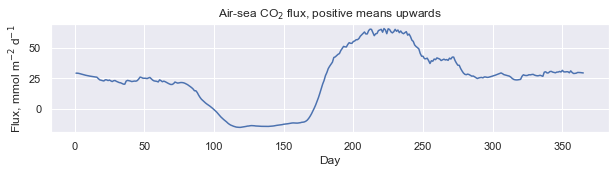

In [4]:
plt.plot(ox, dicflux_surface_year); plt.gcf().set_size_inches(10, 2);
plt.title('Air-sea CO$_2$ flux, positive means upwards');
plt.xlabel('Day'); plt.ylabel('Flux, mmol m$^{-2}$ d$^{-1}$');

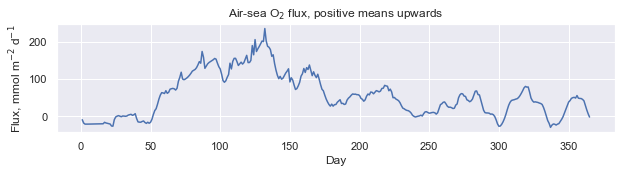

In [5]:
plt.plot(ox, oxyflux_surface_year); plt.gcf().set_size_inches(10, 2);
plt.title('Air-sea O$_2$ flux, positive means upwards');
plt.xlabel('Day'); plt.ylabel('Flux, mmol m$^{-2}$ d$^{-1}$');

#### Advective TA exchange

These are data on how alkalinity in the Wadden Sea changes due to mixing with the North Sea. Positive means alkalinity comes from the North Sea, negative - goes to the North Sea.

In [6]:
nh4ta_df = ds['TA_due_to_NH4'].to_dataframe()
no3ta_df = ds['TA_due_to_NO3'].to_dataframe()
po4ta_df = ds['TA_due_to_PO4'].to_dataframe()
so4ta_df = ds['TA_due_to_SO4'].to_dataframe()

In [7]:
#nh4ta_df.loc[:'2010-04-01'] = 0; nh4ta_df.loc['2012-05-01':] = 0;
#nh4ta_df.loc['2010-05-01':'2011-04-01'] = 0; nh4ta_df.loc['2011-05-01':'2012-04-01'] = 0;

In [8]:
#no3ta_df.loc[:'2010-04-01'] = 0; no3ta_df.loc['2012-05-01':] = 0;
#no3ta_df.loc['2010-05-01':'2011-04-01'] = 0; no3ta_df.loc['2011-05-01':'2012-04-01'] = 0;

In [9]:
#po4ta_df.loc[:'2010-04-01'] = 0; po4ta_df.loc['2012-05-01':] = 0;
#po4ta_df.loc['2010-05-01':'2011-04-01'] = 0; po4ta_df.loc['2011-05-01':'2012-04-01'] = 0;

In [10]:
#nh4ta_rolled = nh4ta_df.rolling(window=15).sum()
#no3ta_rolled = no3ta_df.rolling(window=15).sum()
#po4ta_rolled = po4ta_df.rolling(window=15).sum()

In [28]:
nh4ta_year = nh4ta_df.loc['2011-01-01':'2011-12-31']
no3ta_year = no3ta_df.loc['2011-01-01':'2011-12-31']
po4ta_year = po4ta_df.loc['2011-01-01':'2011-12-31']
so4ta_year = so4ta_df.loc['2011-01-01':'2011-12-31']

In [33]:
nh4ta = np.array(nh4ta_year.TA_due_to_NH4.values)/2
no3ta = 0#np.array(no3ta_year.TA_due_to_NO3.values)
po4ta = np.array(po4ta_year.TA_due_to_PO4.values)
so4ta = np.array(so4ta_year.TA_due_to_SO4.values)
total = nh4ta+no3ta+po4ta+so4ta

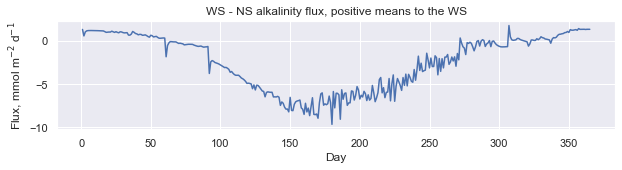

In [34]:
plt.plot(ox, total); plt.gcf().set_size_inches(10, 2);
plt.title('WS - NS alkalinity flux, positive means to the WS');
plt.xlabel('Day'); plt.ylabel('Flux, mmol m$^{-2}$ d$^{-1}$');

In [14]:
year = (('2011-01-01','2011-01-31'), ('2011-02-01','2011-02-28'), ('2011-03-01','2011-03-31'), ('2011-04-01','2011-04-30'), 
        ('2011-05-01','2011-05-31'), ('2011-06-01','2011-06-30'), ('2011-07-01','2011-07-31'), ('2011-08-01','2011-08-31'),
        ('2011-09-01','2011-09-30'), ('2011-10-01','2011-10-31'), ('2011-11-01','2011-11-30'), ('2011-12-01','2011-12-31'))

In [15]:
nh4ta_year = []
no3ta_year = []
po4ta_year = []
so4ta_year = []
for month in year:
    nh4ta_month = nh4ta_df.loc[month[0]:month[1]]
    no3ta_month = no3ta_df.loc[month[0]:month[1]]
    po4ta_month = po4ta_df.loc[month[0]:month[1]]
    so4ta_month = so4ta_df.loc[month[0]:month[1]]
    nh4ta_year.append(nh4ta_month['TA_due_to_NH4'].sum())
    no3ta_year.append(no3ta_month['TA_due_to_NO3'].sum())
    po4ta_year.append(po4ta_month['TA_due_to_PO4'].sum())
    so4ta_year.append(so4ta_month['TA_due_to_SO4'].sum())

In [16]:
nh4ta = np.array(nh4ta_year)
no3ta = np.array(no3ta_year)
po4ta = np.array(po4ta_year)
so4ta = np.array(so4ta_year)
total = nh4ta+no3ta+po4ta+so4ta

here and further, units: mmol m$^{-2}$

In [17]:
nh4ta

array([ -64.53213 ,  -55.855267, -101.58465 , -221.82082 , -321.28275 ,
       -283.35065 , -253.51505 , -229.39455 , -133.82802 ,  -78.93627 ,
        -74.64586 ,  -79.06165 ], dtype=float32)

In [18]:
no3ta

array([  15.327667 ,   12.33527  ,  -41.14745  , -284.06088  ,
       -360.1718   , -189.30997  ,  -32.761337 ,    5.0641522,
          7.0734086,   13.672167 ,  -12.788343 ,    2.9333005],
      dtype=float32)

In [19]:
po4ta

array([ 5.9422994,  5.962412 ,  4.417935 , -4.881191 , -3.34355  ,
        4.2264524, 13.339249 , 14.741951 ,  9.4420805,  6.4696274,
        5.5439887,  7.16879  ], dtype=float32)

In [20]:
so4ta

array([ 58.91359 ,  39.064087,  32.23598 ,  13.713754, -31.663359,
       -88.056274, -86.75834 , -49.64198 , -12.057788,  18.677057,
        34.62847 ,  60.349308], dtype=float32)

In [21]:
total

array([  15.651428 ,    1.5065002, -106.078186 , -497.04916  ,
       -716.4615   , -556.4905   , -359.69547  , -259.2304   ,
       -129.37032  ,  -40.117424 ,  -47.26174  ,   -8.610249 ],
      dtype=float32)

In [22]:
sum(so4ta)

-10.595491409301758

In [23]:
sum(total)

-2703.20698928833